/tmp/ipykernel_18499/199475238.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:1.0f}K'.format(x*1e-3) for x in current_values])


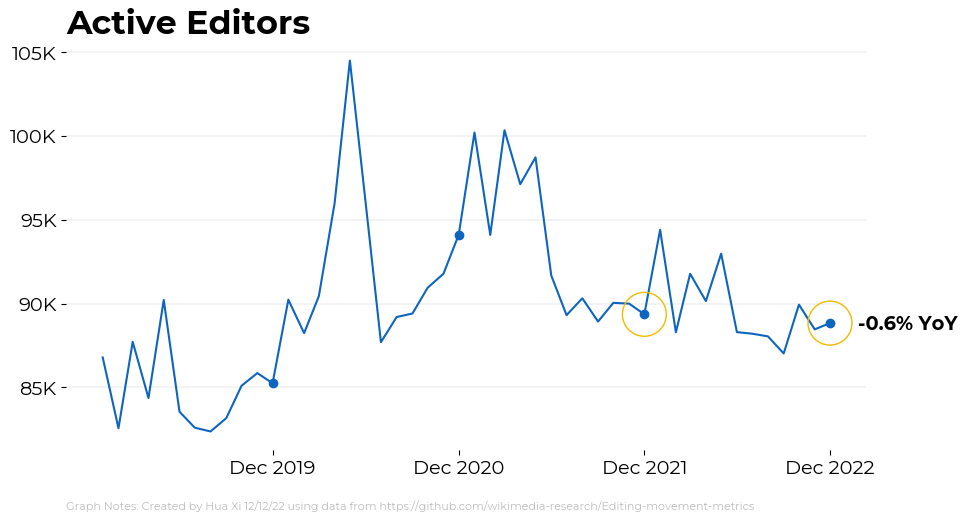

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import os

#---PROMPT FOR INPUT---
#outfile_name = input('Outfile_name:\n') or "Active_Editors_Chart.png"
#yoy_note = input('YoY annotation note (default is blank):\n') or " "
outfile_name = "Active_Editors_Chart.png"
yoy_note = " "

#---READ IN DATA--
#get current path
home_dir = os.getcwd()

#read in csv
df = pd.read_csv(home_dir + '/data/editor_metrics.tsv', sep='\t')

#display top rows for preview
#df.iloc[0,:] 

#---CLEAN DATA--
#look at data types
#print(df.active_editors.dtype)
#print(df.month.dtype)

#convert string to datetime
df['month'] = pd.to_datetime(df['month'])

#---BREAK DATA INTO SUBSETS--
#truncate data to period of interst
df = df[df["month"].isin(pd.date_range("2019-01-01", "2022-12-01"))]
#display data for month of interest only
monthly_df = df[df['month'].dt.month == 12]
#for highlighting
yoy_highlight = pd.concat([df.iloc[-13,:],df.iloc[-1,:]],axis=1).T
#highlighted_months = df[df['month'].isin(['2021-10-01','2022-10-01'])]

#---ADJUST PLOT SIZE---
plt.figure(figsize=(10, 6))

#---PREPARE TO PLOT
#create a dictionary for colors
wmf_colors = {'black75':'#404040','black50':'#7F7F7F','black25':'#BFBFBF','blue':'#0E65C0','brightblue':'#049DFF','brightbluelight':'#C0E6FF','yellow':'#F0BC00','green':'#308557','brightgreen':'#71D1B3'}

#add Montserrat file by file (quick fix)
#font_montserrat = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Regular.ttf")
#font_montserrat_bold = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Bold.ttf")

font_dirs = [home_dir + "/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

#check added fonts
#result = custom_font_manager.get_font_names()
#print(result)

#add grid lines
plt.grid(axis = 'y', zorder=-1, color = wmf_colors['black25'], linewidth = 0.25)
#linestyle = '--'

#---PLOT---
#plot active editor data
plt.plot(df.month, df.active_editors,
	label='Active Editors',
	color=wmf_colors['blue'],
	zorder=3)

#dots on month of interest
plt.scatter(monthly_df.month, monthly_df.active_editors,
	label='_nolegend_',
	color=wmf_colors['blue'],
	zorder=4)
#note: due to a bug in matplotlib, the grid's zorder is fixed at 2.5 so everything plotted must be above 2.5

#draw circle on 2019 and 2022 to highlight for comparison
highlight_radius = 1000000
plt.scatter(yoy_highlight.month, yoy_highlight.active_editors,
	label='_nolegend_',
	s=(highlight_radius**0.5),
	facecolors='none',
	edgecolors=wmf_colors['yellow'],
	zorder=5)

#---FORMATTING---
#add title and axis labels
plt.title('Active Editors',font="Montserrat",weight='bold',fontsize=24,loc='left')
#plt.xlabel("Month",font='Montserrat', fontsize=18, labelpad=10) #source serif pro
#plt.ylabel("Active Editors",font='Montserrat', fontsize=18)

#expand bottom margin
plt.subplots_adjust(bottom=0.2, left=0.1)

#remove bounding box
for pos in ['right', 'top', 'bottom', 'left']:
	plt.gca().spines[pos].set_visible(False)

#format y-axis labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}K'.format(x*1e-3) for x in current_values])
plt.yticks(font = "Montserrat",fontsize=14)

#add monthly x-axis labels
date_labels = []
for dl in monthly_df['month']:
	date_labels.append(datetime.datetime.strftime(dl, '%b %Y'))
plt.xticks(ticks=monthly_df['month'],labels=date_labels,font = "Montserrat",fontsize=14,)

#---ADD ANNOTATIONS---
#YoY Change Annotation
#calculate YoY change
yoy_change_percent = ((yoy_highlight['active_editors'].iat[-1] - yoy_highlight['active_editors'].iat[0]) /  yoy_highlight['active_editors'].iat[0]) * 100
#make YoY annotation
if yoy_change_percent > 0:
	yoy_annotation = f"+{yoy_change_percent:.1f}% YoY" + " " + yoy_note
else:
	yoy_annotation = f"{yoy_change_percent:.1f}% YoY" + " " + yoy_note
plt.annotate(yoy_annotation,
	xy = (yoy_highlight['month'].iat[-1],yoy_highlight['active_editors'].iat[-1]),
	xytext = (20,-5),
	xycoords = 'data',
	textcoords = 'offset points',
	color='black',
	font="Montserrat",
	fontsize=14,
	weight='bold',
	wrap=True,
	bbox=dict(pad=10, facecolor="white", edgecolor="none"))

#data notes
plt.figtext(0.1, 0.1, "Graph Notes: Created by Hua Xi 12/12/22 using data from https://github.com/wikimedia-research/Editing-movement-metrics", fontsize=8, font="Montserrat",color= wmf_colors['black25'])

#---SHOW GRAPH---
save_file_name = home_dir + "/charts/" + outfile_name
plt.savefig(save_file_name, dpi=300)
plt.show()